In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [2]:
from fastai.imports import *

In [3]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
PATH = "data/rosesunflower/"
sz=224

In [5]:
torch.cuda.is_available()

True

In [6]:
torch.backends.cudnn.enabled

True

In [7]:
os.listdir(PATH)

['test 1', 'train', 'tmp', 'models', 'valid', '.ipynb_checkpoints']

In [8]:
os.listdir(f'{PATH}valid')

['sunflower', 'rose']

In [9]:
files = os.listdir(f'{PATH}valid/rose')[:3]
files

['1392579828_ab5a139052.jpg',
 '3072908271_08764c732a_m.jpg',
 '2609353769_dc3654f12f.jpg']

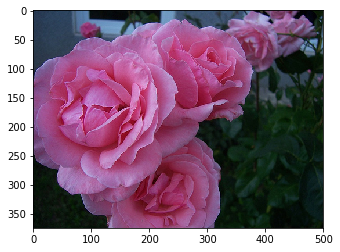

In [10]:
img = plt.imread(f'{PATH}valid/rose/{files[2]}')
plt.imshow(img);

In [76]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, bs= 64,tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      0.320846   0.098728   0.976562  
    1      0.199251   0.098253   0.980469                 
    2      0.142259   0.100007   0.949219                 
    3      0.10967    0.108474   0.984375                 
    4      0.084175   0.108012   0.984375                   



[0.10801237, 0.984375]

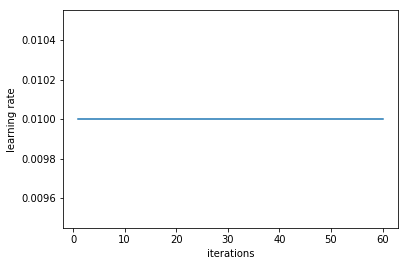

In [73]:
learn.sched.plot_lr()

In [66]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [67]:
lrf=learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 25%|██▌       | 5/20 [00:00<00:00, 15.20it/s, loss=3.82] 


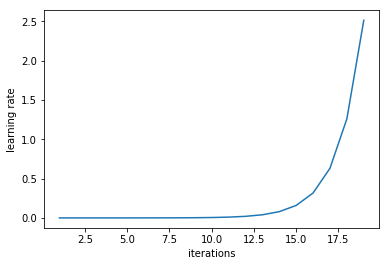

In [68]:
learn.sched.plot_lr()

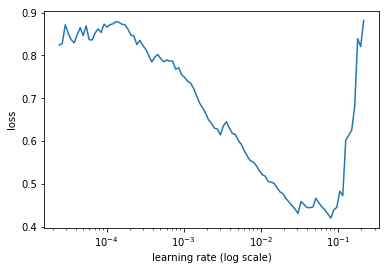

In [38]:
learn.sched.plot()

In [77]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [78]:
data = ImageClassifierData.from_paths(PATH,bs=64, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [69]:
learn.fit(1e-2, 3, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      0.374899   0.154285   0.964844  
    1      0.239622   0.107855   0.976562                 
    2      0.182284   0.108139   0.980469                 



[0.1081385, 0.98046875]

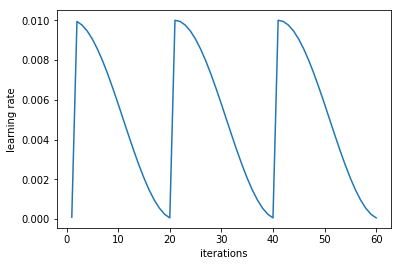

In [70]:
learn.sched.plot_lr()

In [57]:
learn.precompute=False

In [58]:
learn.fit(1e-2, 2, cycle_len=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=4), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.132013   0.080849   0.977679  
    1      0.106023   0.080107   0.977679                   
    2      0.104606   0.08806    0.986607                   
    3      0.091839   0.076201   0.986607                   



[0.07620102, 0.9866071428571429]

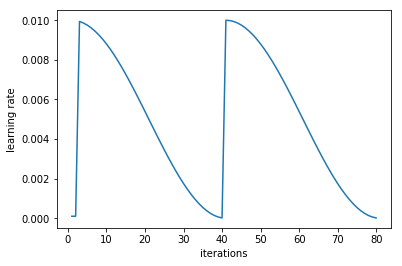

In [44]:
learn.sched.plot_lr()

# Matrix

In [30]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [31]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)


[[99  1]
 [ 2 98]]


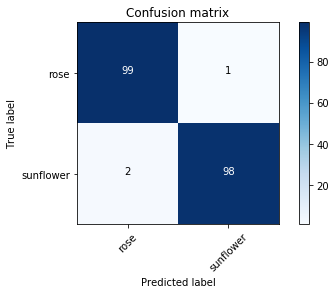

In [33]:
plot_confusion_matrix(cm, data.classes)